In [2]:
from pathlib import Path
import zipfile
import pandas as pd
import yaml
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import plotly.express as px
from sklearn.neighbors import NearestNeighbors

In [3]:
with open("config_metrics.yaml", "r") as f:
    config = yaml.safe_load(f)
    cutoff_initial=config["cutoff_initial"]
    cutoff_final=config["cutoff_final"]


In [4]:
df=pd.read_parquet('E:/sea/CONS/CONV/Data/Output/climate_occurence.parquet')
group_past=df[df["Year"]<= cutoff_initial]
group_present=df[df["Year"]>= cutoff_final]

In [10]:
temp_past_mean=group_past['max_temp'].mean()
temp_present_mean=group_present['max_temp'].mean()
sem_temp_past=group_past['max_temp'].sem()
sem_temp_present=group_present['max_temp'].sem()
lag_index=temp_present_mean - temp_past_mean
print(f"Past Temp:    {temp_past_mean:.2f}°C  (± {sem_temp_past:.2f})")
print(f"Present Temp: {temp_present_mean:.2f}°C  (± {sem_temp_present:.2f})")

Past Temp:    35.82°C  (± 0.64)
Present Temp: 39.22°C  (± 0.23)


In [11]:
u_stat, p_value = stats.mannwhitneyu(
    group_past["max_temp"], 
    group_present["max_temp"], 
    alternative='two-sided'
)

In [12]:
alpha = 0.05
if p_value < alpha:
    print("Significant difference between past and present max temperatures.")

Significant difference between past and present max temperatures.


In [13]:
plot_df=df.copy()
plot_df['Period']="Middle"
plot_df.loc[plot_df["Year"] <= cutoff_initial, "Period"] = "Past"
plot_df.loc[plot_df["Year"] >= cutoff_final, "Period"] = "Present"
plot_df = plot_df[plot_df["Period"] != "Middle"]

C:\Users\HP\AppData\Local\Temp\ipykernel_21200\3598373250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x="Period", y="max_temp", order=["Past", "Present"], palette="muted")


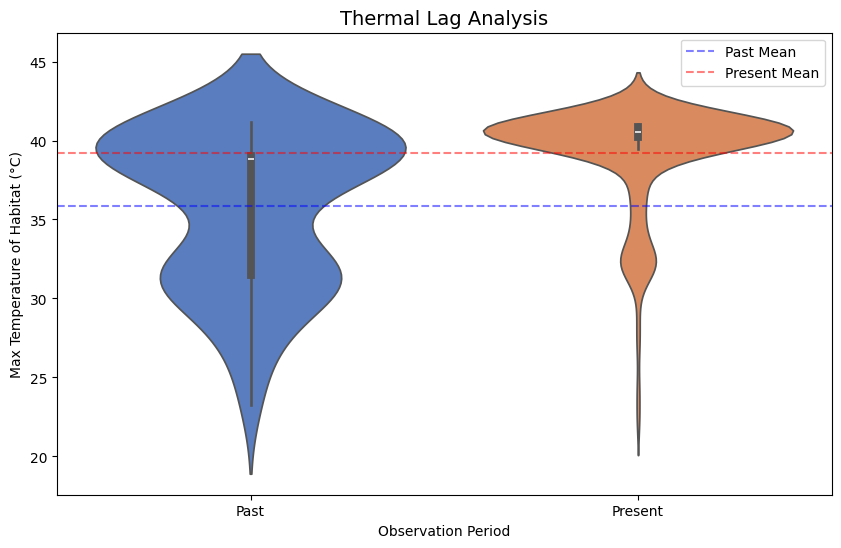

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=plot_df, x="Period", y="max_temp", order=["Past", "Present"], palette="muted")
plt.title("Thermal Lag Analysis", fontsize=14)
plt.ylabel("Max Temperature of Habitat (°C)")
plt.xlabel("Observation Period")
plt.axhline(temp_past_mean, color='blue', linestyle='--', alpha=0.5, label="Past Mean")
plt.axhline(temp_present_mean, color='red', linestyle='--', alpha=0.5, label="Present Mean")
plt.legend()

In [15]:
rain_past = group_past["annual_precipitation"].mean()
rain_present = group_present["annual_precipitation"].mean()
sem_rain_past=group_past['annual_precipitation'].sem()
sem_temp_present=group_present['annual_precipitation'].sem()
precip_lag = rain_present - rain_past

In [16]:
u_stat_rain, p_value_rain = stats.mannwhitneyu(
    group_past["annual_precipitation"], 
    group_present["annual_precipitation"], 
    alternative='two-sided'
)

C:\Users\HP\AppData\Local\Temp\ipykernel_21200\1309210010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x="Period", y="annual_precipitation", order=["Past", "Present"], palette="muted")


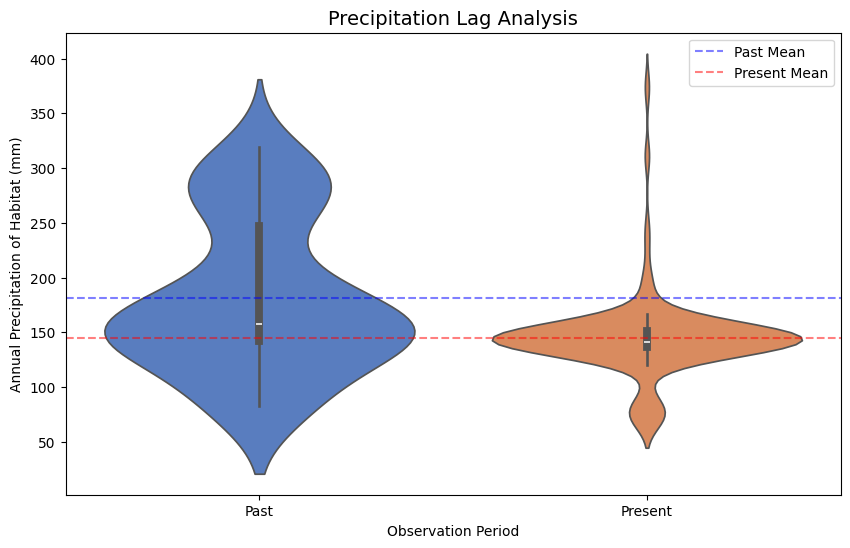

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=plot_df, x="Period", y="annual_precipitation", order=["Past", "Present"], palette="muted")
plt.title("Precipitation Lag Analysis", fontsize=14)
plt.ylabel("Annual Precipitation of Habitat (mm)")
plt.xlabel("Observation Period")
plt.axhline(rain_past, color='blue', linestyle='--', alpha=0.5, label="Past Mean")
plt.axhline(rain_present, color='red', linestyle='--', alpha=0.5, label="Present Mean")
plt.legend()

In [18]:
df_anim=df.sort_values("Year")

In [19]:
df_anim

,Scientific Name,Kingdom,Class,Latitude,Longitude,Coordinate Uncertainty (m),Country Code,Year,Month,Basis of Record,Occurrence Status,Issue,max_temp,annual_precipitation
22,"Panthera tigris (Linnaeus, 1758)",Animalia,Mammalia,29.528658,78.828278,250.0,IN,1994,3.0,HUMAN_OBSERVATION,PRESENT,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,36.349998,142.899994
11,"Panthera tigris (Linnaeus, 1758)",Animalia,Mammalia,25.996317,76.492310,250.0,IN,1994,3.0,HUMAN_OBSERVATION,PRESENT,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,41.150002,82.699997
321,"Panthera tigris sumatrae Pocock, 1929",Animalia,Mammalia,40.166700,-83.083300,NaN,US,1995,2.0,HUMAN_OBSERVATION,PRESENT,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,28.150000,101.199997
322,"Panthera tigris tigris (Linnaeus, 1758)",Animalia,Mammalia,40.166700,-83.083300,NaN,US,1995,2.0,HUMAN_OBSERVATION,PRESENT,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,28.150000,101.199997
18,"Panthera tigris (Linnaeus, 1758)",Animalia,Mammalia,27.468269,84.479630,250.0,NP,1996,12.0,HUMAN_OBSERVATION,PRESENT,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,31.750000,247.300003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,"Panthera tigris (Linnaeus, 1758)",Animalia,Mammalia,11.941584,76.490287,NaN,IN,2024,1.0,HUMAN_OBSERVATION,PRESENT,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,33.650002,82.800003
29,"Panthera tigris (Linnaeus, 1758)",Animalia,Mammalia,22.120021,84.037224,NaN,IN,2024,3.0,HUMAN_OBSERVATION,PRESENT,GEODETIC_DATUM_ASSUMED_WGS84;COUNTRY_DERIVED_F...,39.450001,166.600006
30,"Panthera tigris (Linnaeus, 1758)",Animalia,Mammalia,25.213816,75.864753,NaN,IN,2024,3.0,HUMAN_OBSERVATION,PRESENT,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,42.049999,76.500000
21,"Panthera tigris tigris (Linnaeus, 1758)",Animalia,Mammalia,28.412067,81.471001,250.0,NP,2024,3.0,HUMAN_OBSERVATION,PRESENT,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,34.549999,221.399994


In [26]:
fig=px.scatter_geo(df_anim, lat='Latitude', lon='Longitude',color="max_temp",hover_name="Year",scope='world',projection='natural earth',title='Geographical Distribution of Observations(Max Temp)',animation_frame="Year",animation_group="Year",color_continuous_scale="RdYlBu_r",range_color=[15, 45])

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0},updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "type": "buttons",
        "showactive": False,
        "x": 0.1,
        "y": 0,
        "xanchor": "right",
        "yanchor": "top"
    }]
)
fig.write_html("E:/sea/CONS/CONV/Data/Output/global_map_temp.html")

In [25]:
fig=px.scatter_geo(df_anim, lat='Latitude', lon='Longitude',color="annual_precipitation",hover_name="Year",scope='world',projection='natural earth',title='Geographical Distribution of Observations(Rain)',animation_frame="Year",animation_group="Year",color_continuous_scale="BrBG",range_color=[400, 1200])

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0},updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "type": "buttons",
        "showactive": False,
        "x": 0.1,
        "y": 0,
        "xanchor": "right",
        "yanchor": "top"
    }]
)
fig.write_html("E:/sea/CONS/CONV/Data/Output/global_map_rain.html")

Text(0.5, 1.0, 'Past Niche')

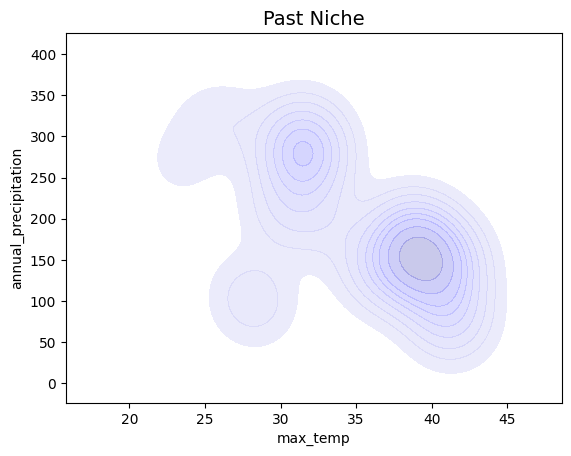

In [27]:
sns.kdeplot(
    data=group_past, x="max_temp", y="annual_precipitation",
    color="blue", fill=True, alpha=0.3, label="Past Niche (≤2015)"
)
plt.title("Past Niche", fontsize=14)

Text(0.5, 1.0, 'Present Niche')

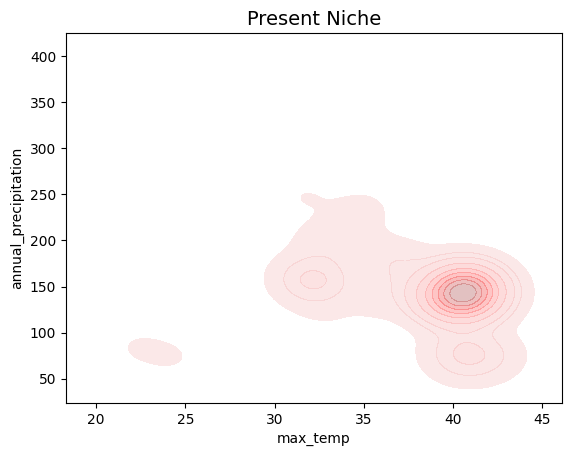

In [28]:
sns.kdeplot(
    data=group_present, x="max_temp", y="annual_precipitation",
    color="red", fill=True, alpha=0.3, label="Present Niche (≥2020)"
)
plt.title("Present Niche", fontsize=14)

In [29]:
coords = df[["Latitude", "Longitude"]].values

In [30]:
def get_avg_neighbor_dist(df):
    if len(df) < 2: return np.nan
    
    # Get coordinates (Lat/Lon)
    coords = df[["Latitude", "Longitude"]].values
    
    # Fit Nearest Neighbor model
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(coords)
    distances, indices = nbrs.kneighbors(coords)
    
    # distances[:, 1] is the distance to the *closest* neighbor (index 0 is self)
    # We convert roughly from degrees to km (multiply by ~111km)
    return np.mean(distances[:, 1]) * 111

In [31]:
coords

array([[ 27.546213,  84.256294],
       [ 27.21522 ,  84.98547 ],
       [ 29.843404,  78.189916],
       [ 23.663864,  81.013351],
       [ 25.996317,  76.49231 ],
       [ 52.27359 ,   7.457511],
       [ 26.608788,  93.294525],
       [ 25.996317,  76.49231 ],
       [ 52.502377,  13.529042],
       [ 23.663864,  81.013351],
       [ 27.57646 ,  84.359894],
       [ 25.996317,  76.49231 ],
       [ 22.41103 ,  80.608063],
       [ 25.996317,  76.49231 ],
       [ 22.41103 ,  80.608063],
       [ 23.663864,  81.013351],
       [ 27.468269,  84.47963 ],
       [ 51.673656,   7.790796],
       [ 27.468269,  84.47963 ],
       [ 26.937222,  92.853699],
       [ 25.996317,  76.49231 ],
       [ 28.412067,  81.471001],
       [ 29.528658,  78.828278],
       [ 23.663864,  81.013351],
       [ 25.996317,  76.49231 ],
       [ 26.919804,  92.829636],
       [ 50.11615 ,   8.701043],
       [ 10.335628,  76.963406],
       [ 10.376316,  76.993157],
       [ 22.120021,  84.037224],
       [ 2

In [32]:
years = sorted(df["Year"].unique())
fragmentation_stats = []

for y in years:
    subset = df[df["Year"] == y]
    avg_dist = get_avg_neighbor_dist(subset)
    fragmentation_stats.append({"Year": y, "Avg_Distance_km": avg_dist, "Count": len(subset)})

frag_df = pd.DataFrame(fragmentation_stats)

In [33]:
frag_df

,Year,Avg_Distance_km,Count
0,1994,470.071298,2
1,1995,0.000000,2
2,1996,18652.817855,2
3,2005,174.330478,10
4,2006,291.693125,6
5,2007,0.000000,2
6,2008,271.997333,3
7,2009,141.171286,4
8,2010,404.680518,3
9,2011,NaN,1


C:\Users\HP\AppData\Local\Temp\ipykernel_21200\3187131283.py:16: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



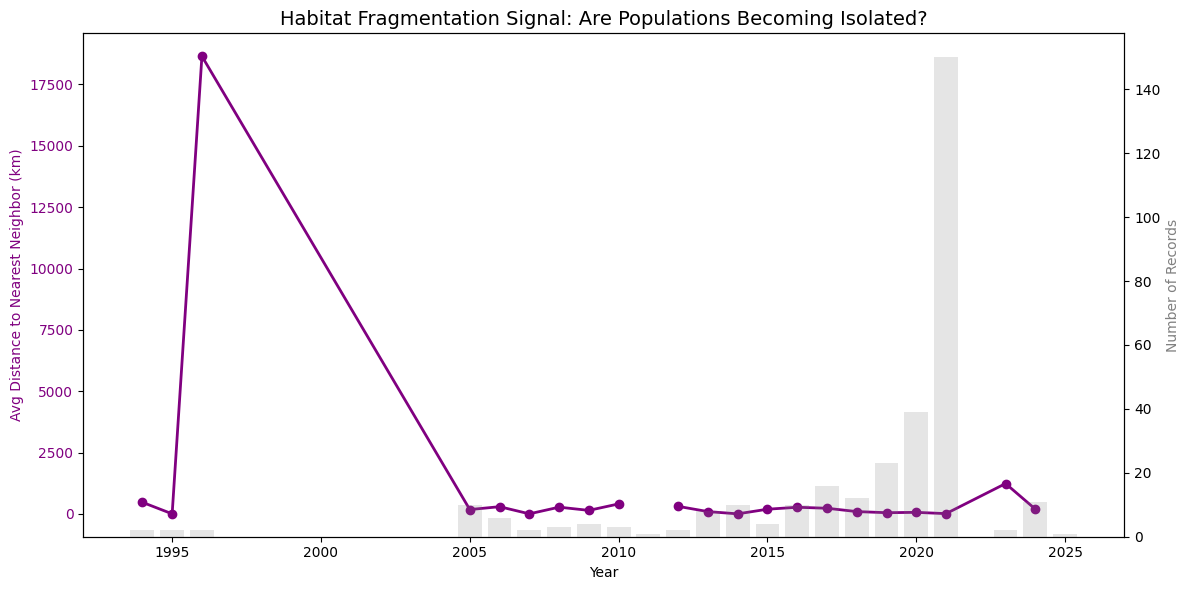

In [35]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Distance (Primary Axis)
ax1.plot(frag_df["Year"], frag_df["Avg_Distance_km"], color='purple', marker='o', linewidth=2, label="Isolation (Avg Distance)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Avg Distance to Nearest Neighbor (km)", color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Plot Count (Secondary Axis) to show we aren't just seeing sample size effects
ax2 = ax1.twinx()
ax2.bar(frag_df["Year"], frag_df["Count"], color='gray', alpha=0.2, label="Observation Count")
ax2.set_ylabel("Number of Records", color='gray')

plt.title("Habitat Fragmentation Signal: Are Populations Becoming Isolated?", fontsize=14)
fig.tight_layout()
fig.show()